# Plotting
## A very brief introduction

For more information see e.g. Chapter 04 of the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

# `Matplotlib`
First and most comprehensive package to create plots in Python

In [1]:
import matplotlib.pyplot as plt
# the following might be needed to render plots directly into the notebook 
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv("data/data_full.txt")
df.head()

,subject,sex,age,score
0,sub0,F,35,52
1,sub1,M,75,76
2,sub2,F,79,92
3,sub3,M,54,60
4,sub4,F,65,78


# Histogramm

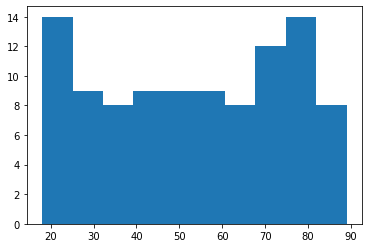

In [3]:
plt.hist(df["age"]);

`pandas` has some plotting functionalities built in

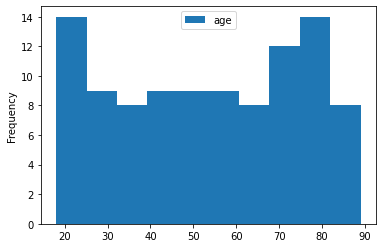

In [4]:
df[["age"]].plot.hist()

## Boxplot

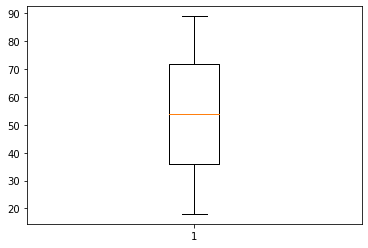

In [5]:
plt.boxplot(df["age"]);

# Scatter plot

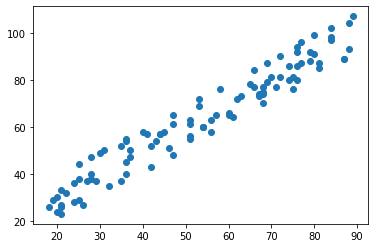

In [6]:
plt.scatter(df["age"], df["score"])

## How do you like the plots?

**What about axis labels?**

# `Seaborn`
Wrapper around `matplotlib`. Is tailored to data from `pandas` data structures.


In [7]:
import seaborn as sns

# Histogramm

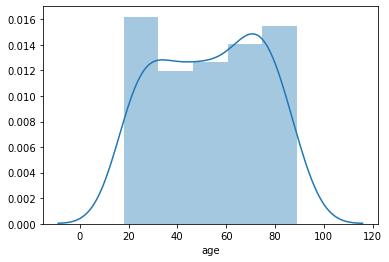

In [8]:
sns.distplot(df["age"])

## Boxplot

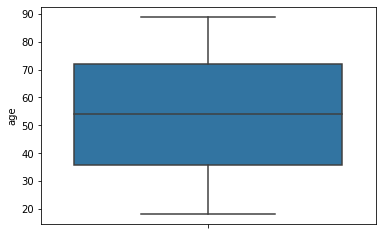

In [9]:
sns.boxplot(y="age", data=df);

## Violinplot

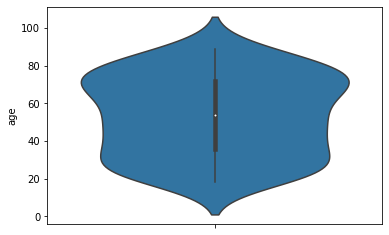

In [10]:
sns.violinplot(y="age", data=df);

# Scatter plot

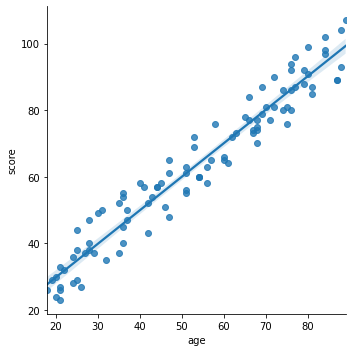

In [11]:
sns.lmplot("age", "score", data=df);

## Pairplot

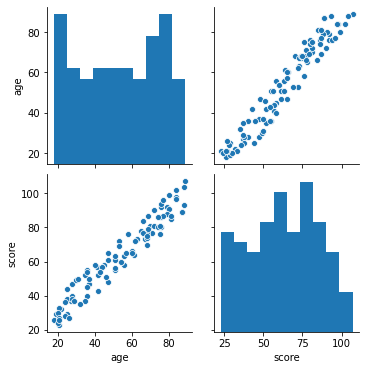

In [12]:
sns.pairplot(df);

# Groups

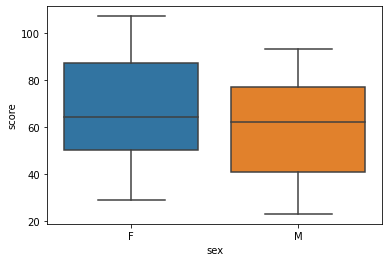

In [13]:
sns.boxplot(x="sex", y="score", data=df);

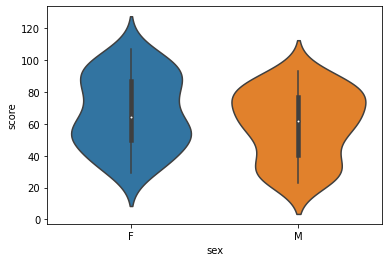

In [14]:
sns.violinplot(x="sex",y="score", data=df);

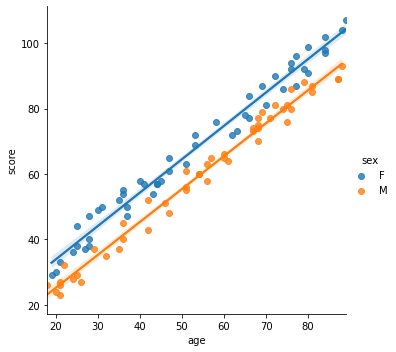

In [15]:
sns.lmplot("age", "score", data=df, hue="sex");

## Pairplot

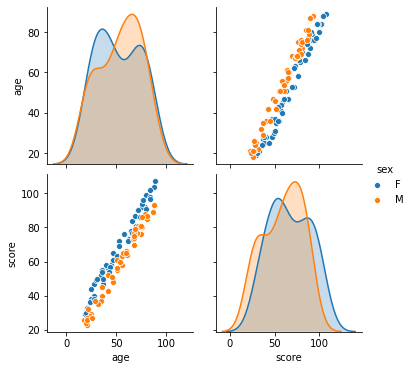

In [16]:
sns.pairplot(df, hue="sex");

## For more

`seaborn` [Examples](https://seaborn.pydata.org/examples/index.html) and 
[Tutorials](https://seaborn.pydata.org/tutorial.html)

# Saving figures
```python
fig = sns.pairplot(df, hue="sex");
fig.savefig("data/pair.pdf")
```

# Other libraries

* [`Altair`](http://altair-viz.github.io): Declarative Visualization in Python
* Interactive plots with [`plotly`](https://plotly.com/python/)
* Interactive plots with [`bokeh`](https://docs.bokeh.org/en/latest/index.html)
* Dashboards with [`dash`](https://dash-gallery.plotly.host/Portal/)

In [17]:
# source: https://altair-viz.github.io/gallery/density_facet.html
import altair as alt
from vega_datasets import data

source = data.iris()

p = alt.Chart(source).transform_fold(
    ['petalWidth',
     'petalLength',
     'sepalWidth',
     'sepalLength'],
    as_ = ['Measurement_type', 'value']
).transform_density(
    density='value',
    bandwidth=0.3,
    groupby=['Measurement_type'],
    extent= [0, 8]
).mark_area().encode(
    alt.X('value:Q'),
    alt.Y('density:Q'),
    alt.Row('Measurement_type:N')
).properties(width=300, height=50)

In [18]:
p

alt.Chart(...)

In [19]:
#https://altair-viz.github.io/gallery/isotype_emoji.html
import altair as alt
import pandas as pd

source = pd.DataFrame([
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'}
    ])

In [20]:
alt.Chart(source).mark_text(size=45, baseline='middle').encode(
    alt.X('x:O', axis=None),
    alt.Y('animal:O', axis=None),
    alt.Row('country:N', header=alt.Header(title='')),
    alt.Text('emoji:N')
).transform_calculate(
    emoji="{'cattle': '🐄', 'pigs': '🐖', 'sheep': '🐏'}[datum.animal]"
).transform_window(
    x='rank()',
    groupby=['country', 'animal']
).properties(width=550, height=140)

alt.Chart(...)